In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"/content/placement.csv")
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
data.shape

(200, 2)

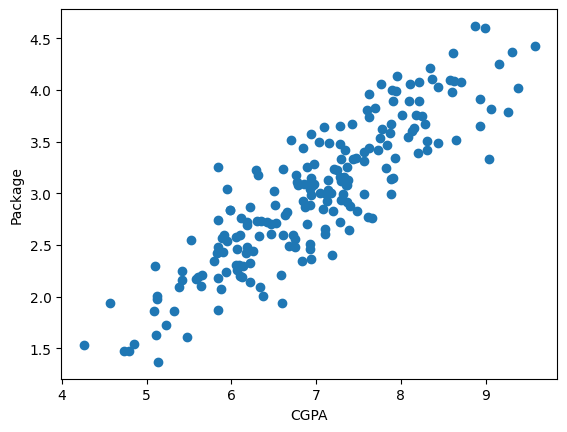

In [5]:
plt.scatter(data['cgpa'],data['package'])
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show()

In [6]:
ip = data['cgpa']
op = data['package']

In [7]:
ip.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [8]:
op.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=2)

In [10]:
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [11]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
x_train.shape

(160,)

**Building Linear Regression Model from Scratch**

In [13]:
class linear_regression:
  def __init__(self):
    self.m = None
    self.b = None
  def fit(self,x_train,y_train):
    num = 0
    den = 0
    for i in x_train.index:
      num = num + ((y_train[i]-y_train.mean())*(x_train[i]-x_train.mean()))
      den = den + ((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))
    self.m = num/den

    self.b = y_train.mean() - (self.m * x_train.mean())

  def predict(self,x_test):
    return self.b+(self.m * x_test)

In [14]:
lr  = linear_regression()
lr.fit(x_train,y_train)

In [15]:
pred = lr.predict(x_test)
pred

,cgpa
112,3.891116
29,3.093245
182,2.384646
199,2.574349
193,1.653729
85,1.776478
10,2.072193
54,2.931439
115,3.762787
35,2.937018


In [16]:
df = pd.DataFrame({"Actual" : list(y_test) , "Predicted" : pred })
df

,Actual,Predicted
112,4.10,3.891116
29,3.49,3.093245
182,2.08,2.384646
199,2.33,2.574349
193,1.94,1.653729
85,1.48,1.776478
10,1.86,2.072193
54,3.09,2.931439
115,4.21,3.762787
35,2.87,2.937018


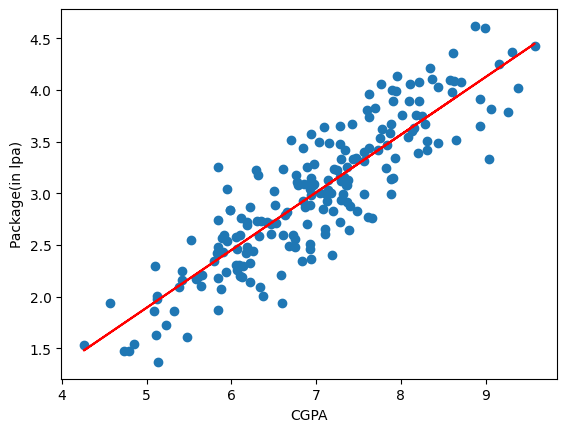

In [18]:
plt.scatter(data['cgpa'],data['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

**Metrics**

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [20]:
print("MSE:",mean_squared_error(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("R2 Score:",r2_score(y_test,pred))

MSE: 0.12129235313495523
MAE: 0.2884710931878174
R2 Score: 0.7807301475103842


In [21]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
print("RMSE:",rmse)

RMSE: 0.3482705171773161


In [23]:
x_test.shape[0]

40

In [25]:
r2 = r2_score(y_test,pred)
r2_adj =1- ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-1-1))
print("R2 adjusted:",r2_adj)

R2 adjusted: 0.7749598882343417
